In [4]:
import csv


def read_csv_and_calculate_means(file_path):
    with open(file_path, mode='r') as file:
        csv_reader = csv.reader(file)
        header = next(csv_reader)  # Skip the header

        data = []
        for row in csv_reader:
            data.append([float(value) if i >= 3 else value for i, value in enumerate(row)])

        means = []
        for i in range(0, len(data), 6):
            chunk = data[i:i+6]
            if len(chunk) < 6:
                continue  # Skip incomplete chunks

            mean_chunk = [chunk[0][0], chunk[0][1], chunk[0][2]]  # Threads, Schedule, ChunkSize
            mean_time = sum(row[3] for row in chunk) / 6
            mean_total_time = sum(row[4] for row in chunk) / 6
            mean_chunk.extend([mean_time, mean_total_time])
            means.append(mean_chunk)

        return means

file_path = './times.csv'
means = read_csv_and_calculate_means(file_path)

for mean in means:
    print(f"Threads: {mean[0]}, Schedule: {mean[1]}, ChunkSize: {mean[2]}, Mean Time: {mean[3]:.6f}, Mean TotalTime: {mean[4]:.6f}")


Threads: 24, Schedule: static, ChunkSize: 8, Mean Time: 0.571672, Mean TotalTime: 2.720459
Threads: 24, Schedule: guided, ChunkSize: 8, Mean Time: 0.250883, Mean TotalTime: 1.527710
Threads: 24, Schedule: dynamic, ChunkSize: 8, Mean Time: 2.465302, Mean TotalTime: 7.290224
Threads: 24, Schedule: static, ChunkSize: 16, Mean Time: 0.524198, Mean TotalTime: 2.376613
Threads: 24, Schedule: guided, ChunkSize: 16, Mean Time: 0.260213, Mean TotalTime: 1.556795
Threads: 24, Schedule: dynamic, ChunkSize: 16, Mean Time: 1.608393, Mean TotalTime: 4.904381
Threads: 24, Schedule: static, ChunkSize: 32, Mean Time: 0.426757, Mean TotalTime: 2.106861
Threads: 24, Schedule: guided, ChunkSize: 32, Mean Time: 0.259303, Mean TotalTime: 1.548377
Threads: 24, Schedule: dynamic, ChunkSize: 32, Mean Time: 1.104818, Mean TotalTime: 3.663963
Threads: 24, Schedule: static, ChunkSize: 64, Mean Time: 0.347054, Mean TotalTime: 1.924750
Threads: 24, Schedule: guided, ChunkSize: 64, Mean Time: 0.249910, Mean TotalTim

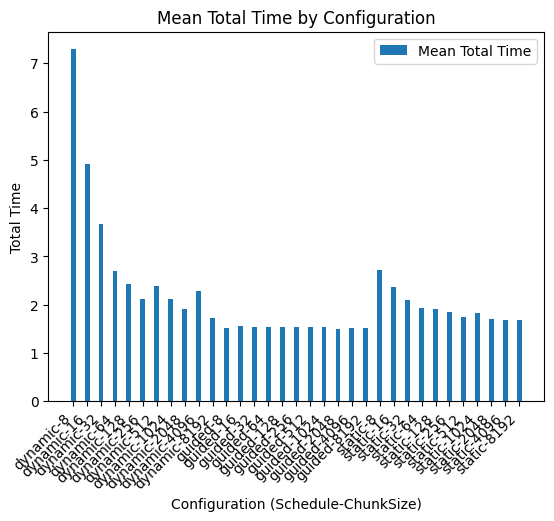

In [5]:
import matplotlib.pyplot as plt

# Sort the means list by schedule and then by chunk size
means_sorted = sorted(means, key=lambda x: (x[1], int(x[2])))

# Extract data for plotting
labels_sorted = [f"{mean[1]}-{mean[2]}" for mean in means_sorted]
mean_total_times_sorted = [mean[4] for mean in means_sorted]

# Create a bar plot
fig, ax = plt.subplots()
bar_width = 0.35
index_sorted = range(len(means_sorted))

bar = ax.bar(index_sorted, mean_total_times_sorted, bar_width, label='Mean Total Time')

ax.set_xlabel('Configuration (Schedule-ChunkSize)')
ax.set_ylabel('Total Time')
ax.set_title('Mean Total Time by Configuration')
ax.set_xticks(index_sorted)
ax.set_xticklabels(labels_sorted, rotation=45, ha='right')
ax.legend()

plt.show()
